# ELE510 Image Processing with robot vision: LAB, Exercise 3, Histogram and point transformations

## Problem 1

The histogram for an image of a **black** cilinder and **white** background is $[5600,980,10,0,0,40,11200,80000]$, where 8 gray levels are used. 

The radius of the cilinder is $r = 85\text{mm}$ and the height is $h = 310\text{mm}$. The cilinder is perfectly oriented to only see the lateral area, but not the top or bottom of the cilinder. 

Use this information to find the pixel size, $\Delta x = \Delta y$.

**Describe the steps to arrive to the solution.**

Probelm 1:
The procedure is very simple we first need to relate the cilinder to the image, this can be done using the histogram and the fact that the cilinder is perfectly oriented to only see the lateral area. The histogram can tell us how many pixels the cilider takes in the image, and we know the radius and height of the cilinder, so we can calculate the pixel rateo. I will assume that the values of the gray colors represents black as the first element and white as the last one as if it was in RGB (Black 0 and white 255).

The steps in the procedure are the following:
- Calculate the area of the visible cilinder in the image, since only the side is visible we can treat it like a rectangle.
- Calculate the total number of pixels that the cilinder occupies by summing non white pixels in the histogram.
- Calculate the rateo between the area of the cilinder and the number of pixels it occupies.
- And finally calclulate $\Delta x$ and $\Delta y$ by using the square root of the rateo since the pixel is rectangular

In [56]:
from math import sqrt

radius = 85
height = 310

#calculate area of the visible cinlinder
area = radius*2*height

#caluclate background number of pixels given the historam
histogram = [5600,980,10,0,0,40,11200,80000]

#sum all the pixels excluding the last
obj = sum(histogram[:-1])

#calculate the area of the cilinder rateo of the object
rateo = area/obj

print("Each pixel corrisponds to : ",rateo,"mm^2")

#calculate the delta x and delta y of the pixel by using the rateo
D_x = sqrt(2*rateo)

print("The Delta x and Delta y of the pixel is : ",D_x,"mm")


Each pixel corrisponds to :  2.955692652832305 mm^2
The Delta x and Delta y of the pixel is :  2.4313340588377836 mm



## Problem 2

For images, such as `./images/christmas.png`, some processing is normally desired to improve the contrast. The simplest approach for doing this is called histogram stretching. For a given image, where the used pixel values range from $g_{\text{min}}$ to $g_{\text{max}}$ we can spread these so they cover the entire $[0, G-1]$ range. The formula for histogram stretching is given by:

\begin{equation*}
	g_{\text{new}} = \left\lfloor {\frac{g_{\text{old}}-g_{\text{min}}}{g_{\text{max}}-g_{\text{min}}}G + 0.5} \right\rfloor
\end{equation*}

Where $g_{\text{old}}$ is an old pixel value, and $g_{\text{new}}$ a new pixel value.

**a)** Make a small Python function, taking an image as input, perform histogram stretching using the previous equation, and giving the increased contrast image as output. Use an 8-bit grayscale range (G=255). Show and explain the result using `./images/christmas.png` as an example. 



In [57]:
# Import the packages
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [58]:
"""
Function that takes in input an image and return the same image stretched.
"""
def histogram_stretch(img):
    max = np.max(img)
    min = np.min(img)

    return (((img-min)/(max-min))*255+0.5).astype(np.uint8)

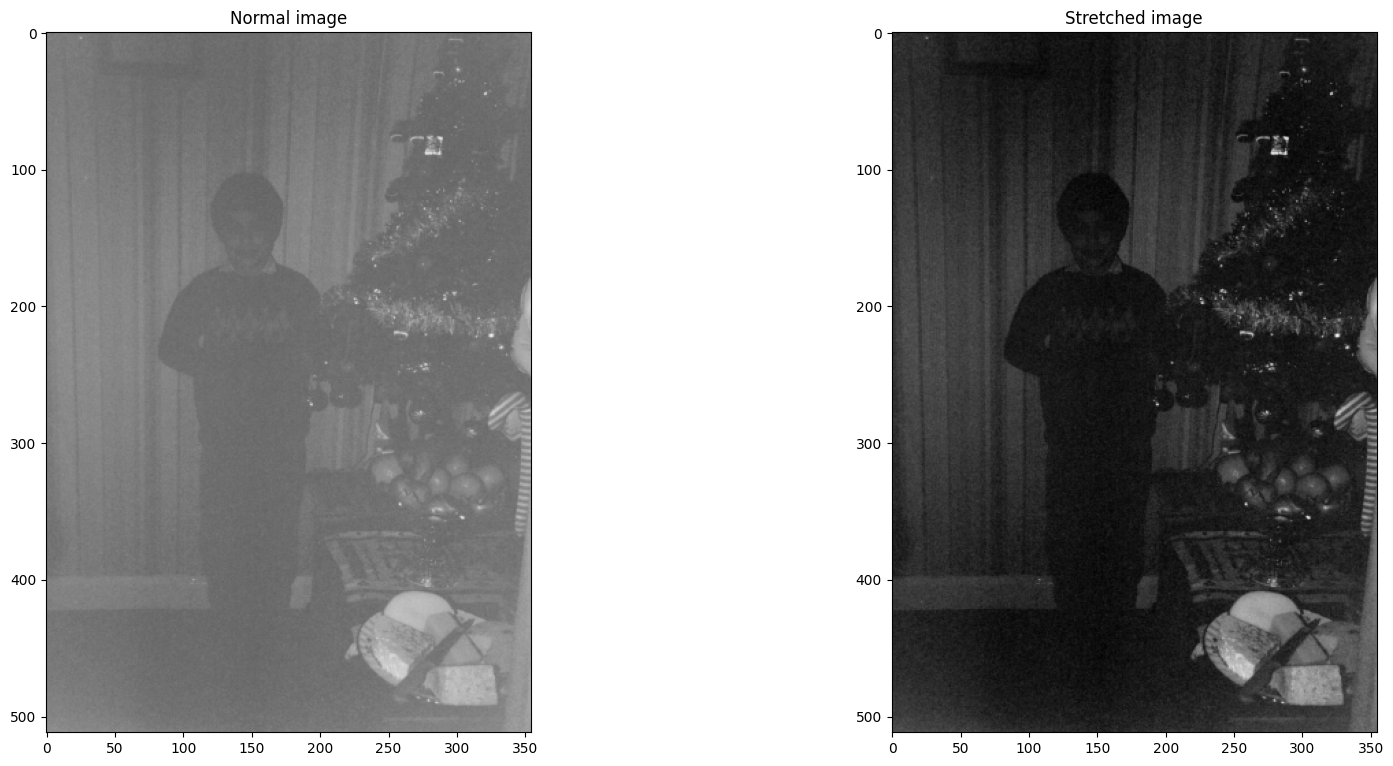

In [59]:
# Read the image and convert it to RGB channels
img = cv2.imread("./images/christmas.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use the function to improve the contrast of the image
img_stretch = histogram_stretch(img)
max = np.max(img_stretch)
min = np.min(img_stretch)


plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(img)
plt.title('Normal image')
plt.subplot(222)
plt.imshow(img_stretch)
plt.title('Stretched image')
plt.show()



## Problem 3

In this experiment we use **four** images. 
The two first are gray level images, `./images/pout.jpg` and `./images/tire.jpg`. 
The other two are colour images captured with a standard digital camera. 
We want to study image enhancement with histogram equalization. 

*We simplify by using only gray level images*. 
Therefore, the colour images are first read to gray level; a grey level image can be imported using the flag (`cv2.IMREAD_GRAYSCALE`). 
The colour images are `./images/waterfall2.jpg` and `./images/restaurantSpain.jpg`, available from CANVAS.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    <p>1. Make a Python function or script that do histogram equalization <code>cv2.equalizeHist</code>, </p>
    <p>2. computes the histograms <code>plt.hist</code> for both the input image and the output image, </p>
    <p>3. and displays both images with histograms in the same figure (use <code>plt.figure</code> and <code>plt.subplot</code>).</p>
</details>


**a)** Use Python and find the histograms for the images. Plot the normalized cumulative distribution function (CDF) over the histogram.


In [64]:
def his_cdf(image):
    # Calculate the histogram of the image
    histogram, bins = np.histogram(image, bins=256, range=(0, 256))

    # Compute the cumulative distribution function (CDF)
    cdf = histogram.cumsum()

    # Normalize the CDF based on histogram
    cdf_normalized = cdf * histogram.max()/ cdf.max()
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)

    plt.hist(image.flatten(), bins=256, range=(0, 256), color='orange', alpha=0.7, label='Histogram')
    
    plt.plot(np.arange(256), cdf_normalized, color='tab:purple', label='CDF')   
    
    plt.title("Histogram and CDF")
    plt.xlabel("Pixel Value")
    plt.ylabel("Normalized Frequency")
    plt.legend()
    plt.subplot(222)
    plt.imshow(image)
    plt.show()

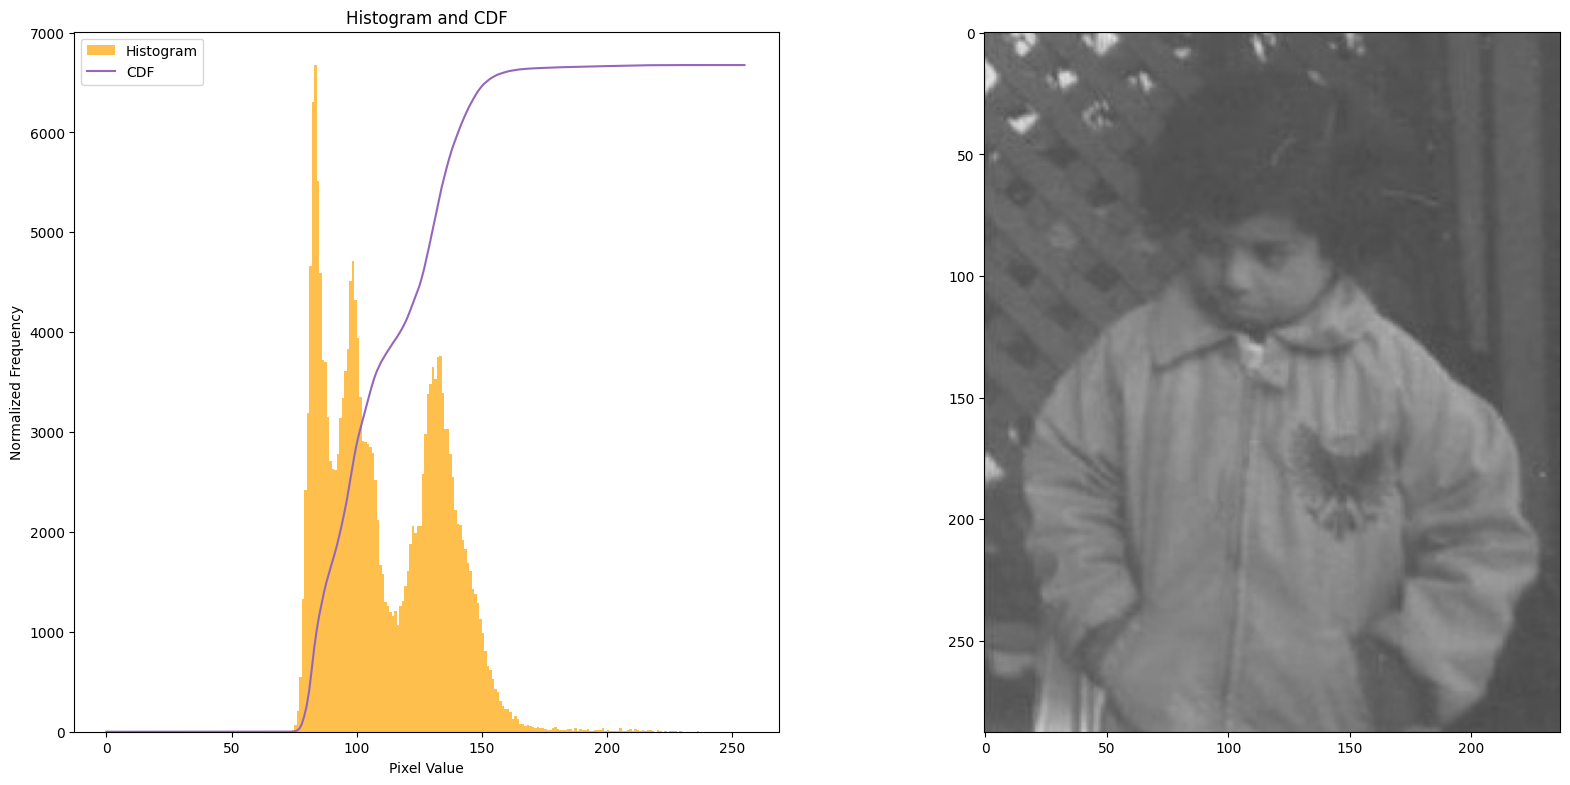

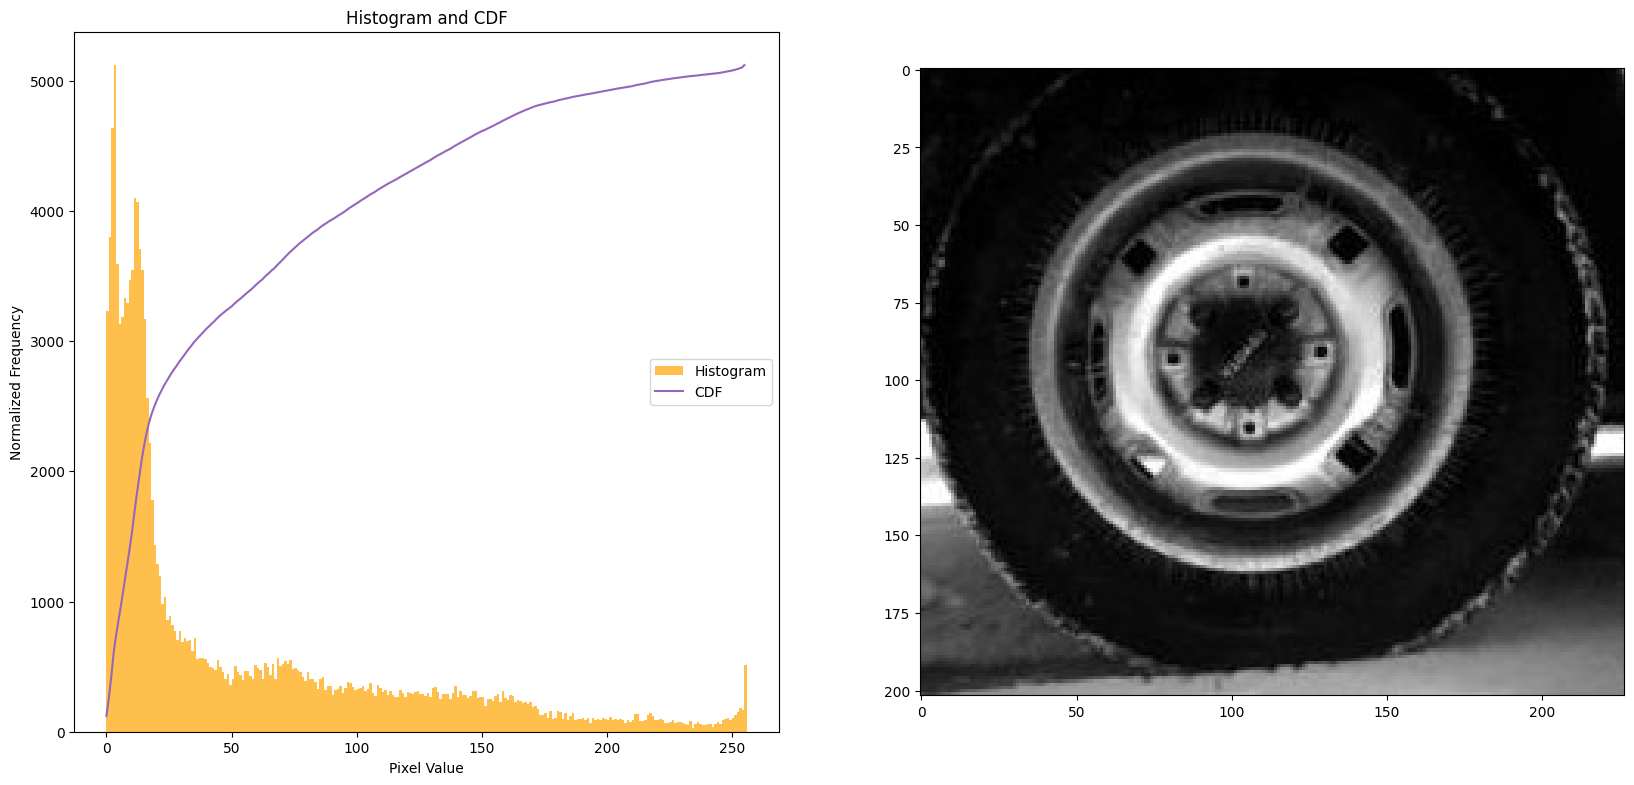

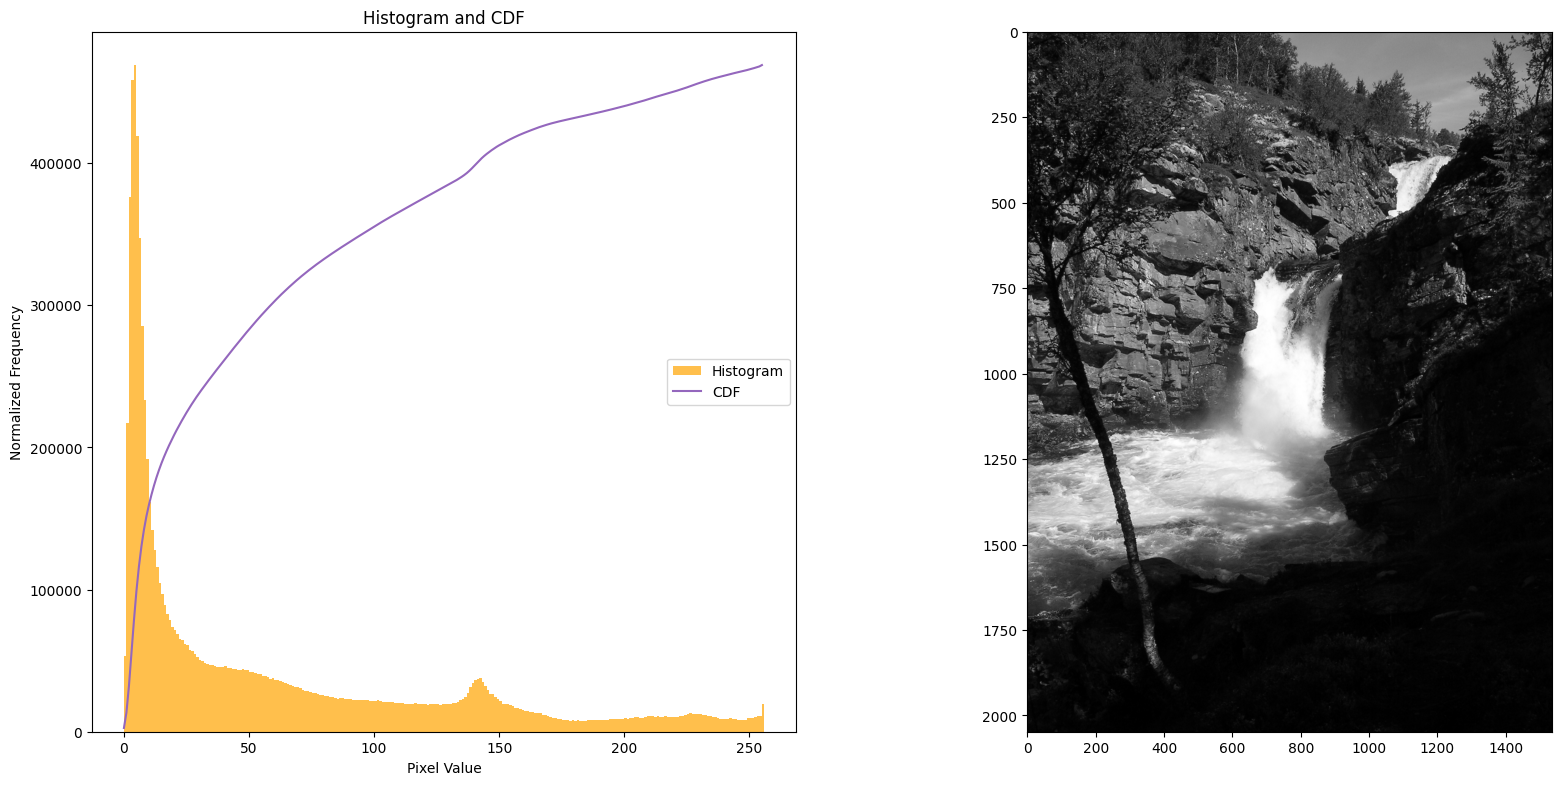

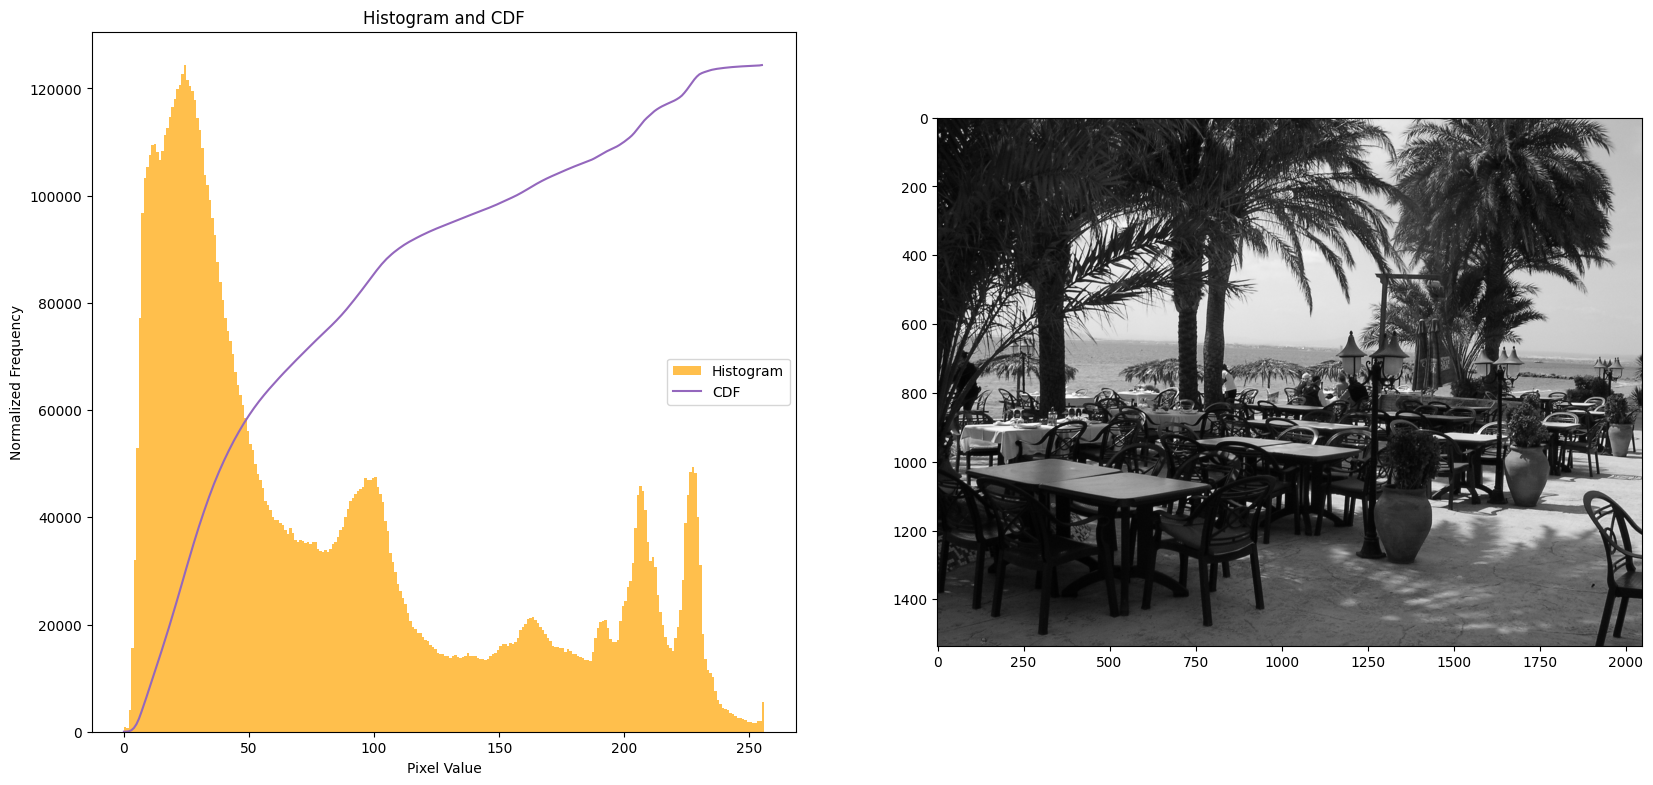

In [65]:
paths = ["./images/pout.jpg","./images/tire.jpg","./images/waterfall2.jpg","./images/restaurantSpain.jpg"]

for i in paths:
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    his_cdf(img)


**b)** Perform histogram equalization of these images and find the new histograms.  Plot the normalized CDF over the new histogram. Discuss the effect of the equalization over the histogram and its CDF.


In [66]:
def his_eq(image):
    equalized_image = cv2.equalizeHist(image)

    equalized_histogram, _ = np.histogram(equalized_image, bins=256, range=(0, 256))
    
    equalized_cdf = equalized_histogram.cumsum()
    equalized_cdf_normalized = equalized_cdf * equalized_histogram.max()/ equalized_cdf.max()

    plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 3)
    plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7, label='Histogram')
    plt.plot(np.arange(256), equalized_cdf_normalized, color='tab:purple', label='CDF')
    plt.title(f"Equalized Histogram and CDF")
    plt.xlabel("Pixel Value")
    plt.ylabel("Normalized Frequency")
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.imshow(equalized_image, cmap='gray')
    plt.title(f"Equalized Image")

    plt.tight_layout()
    plt.show()

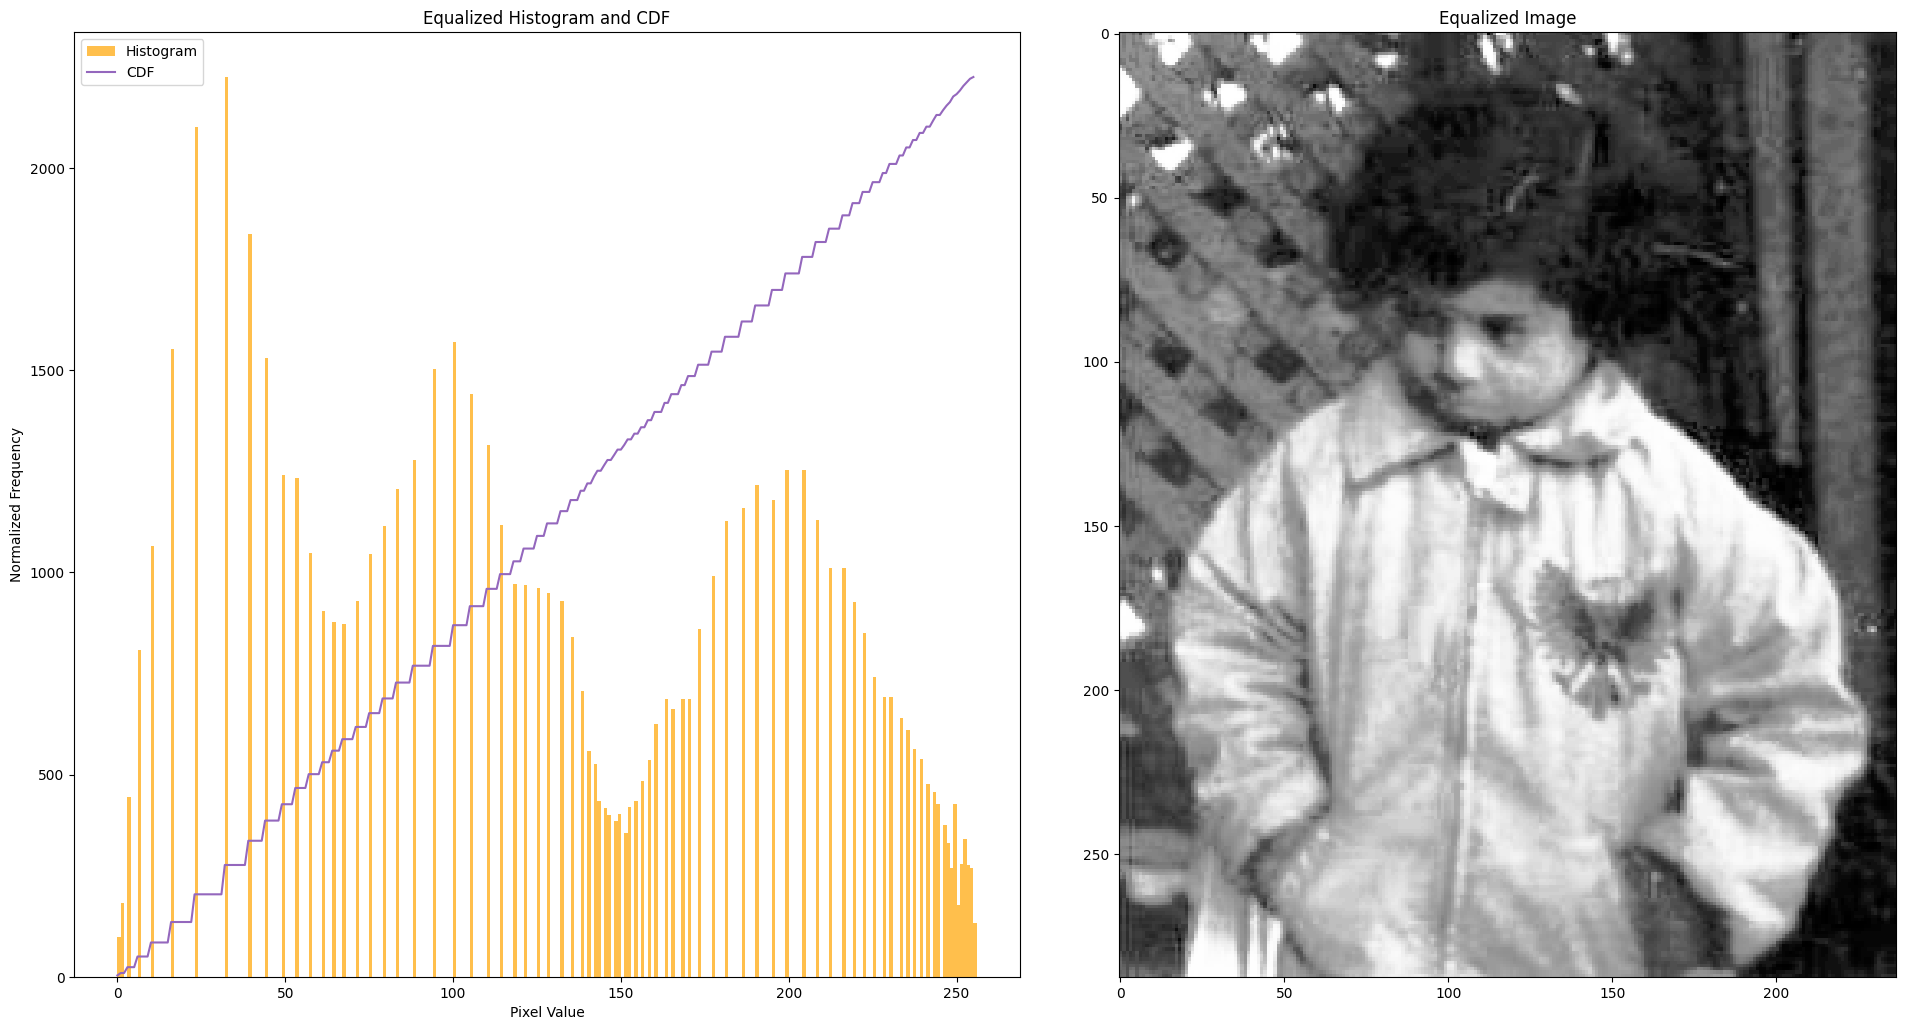

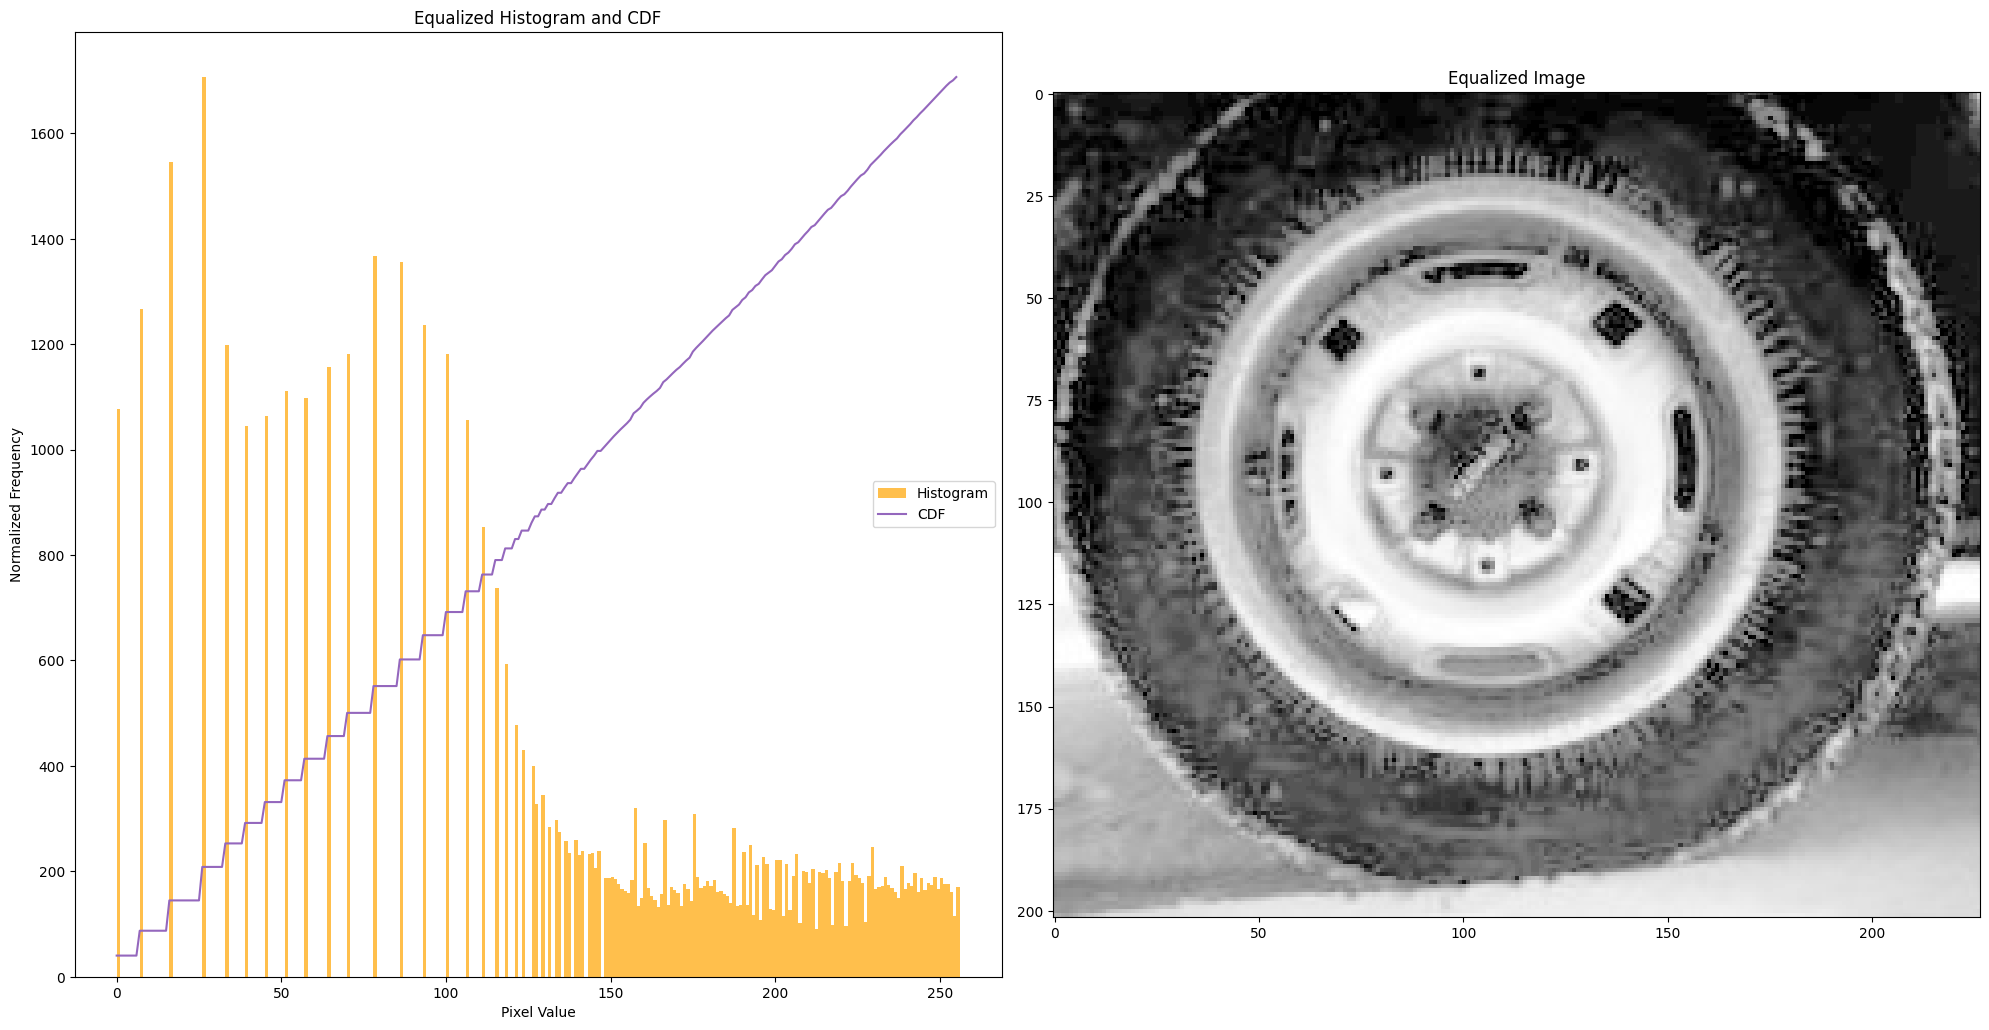

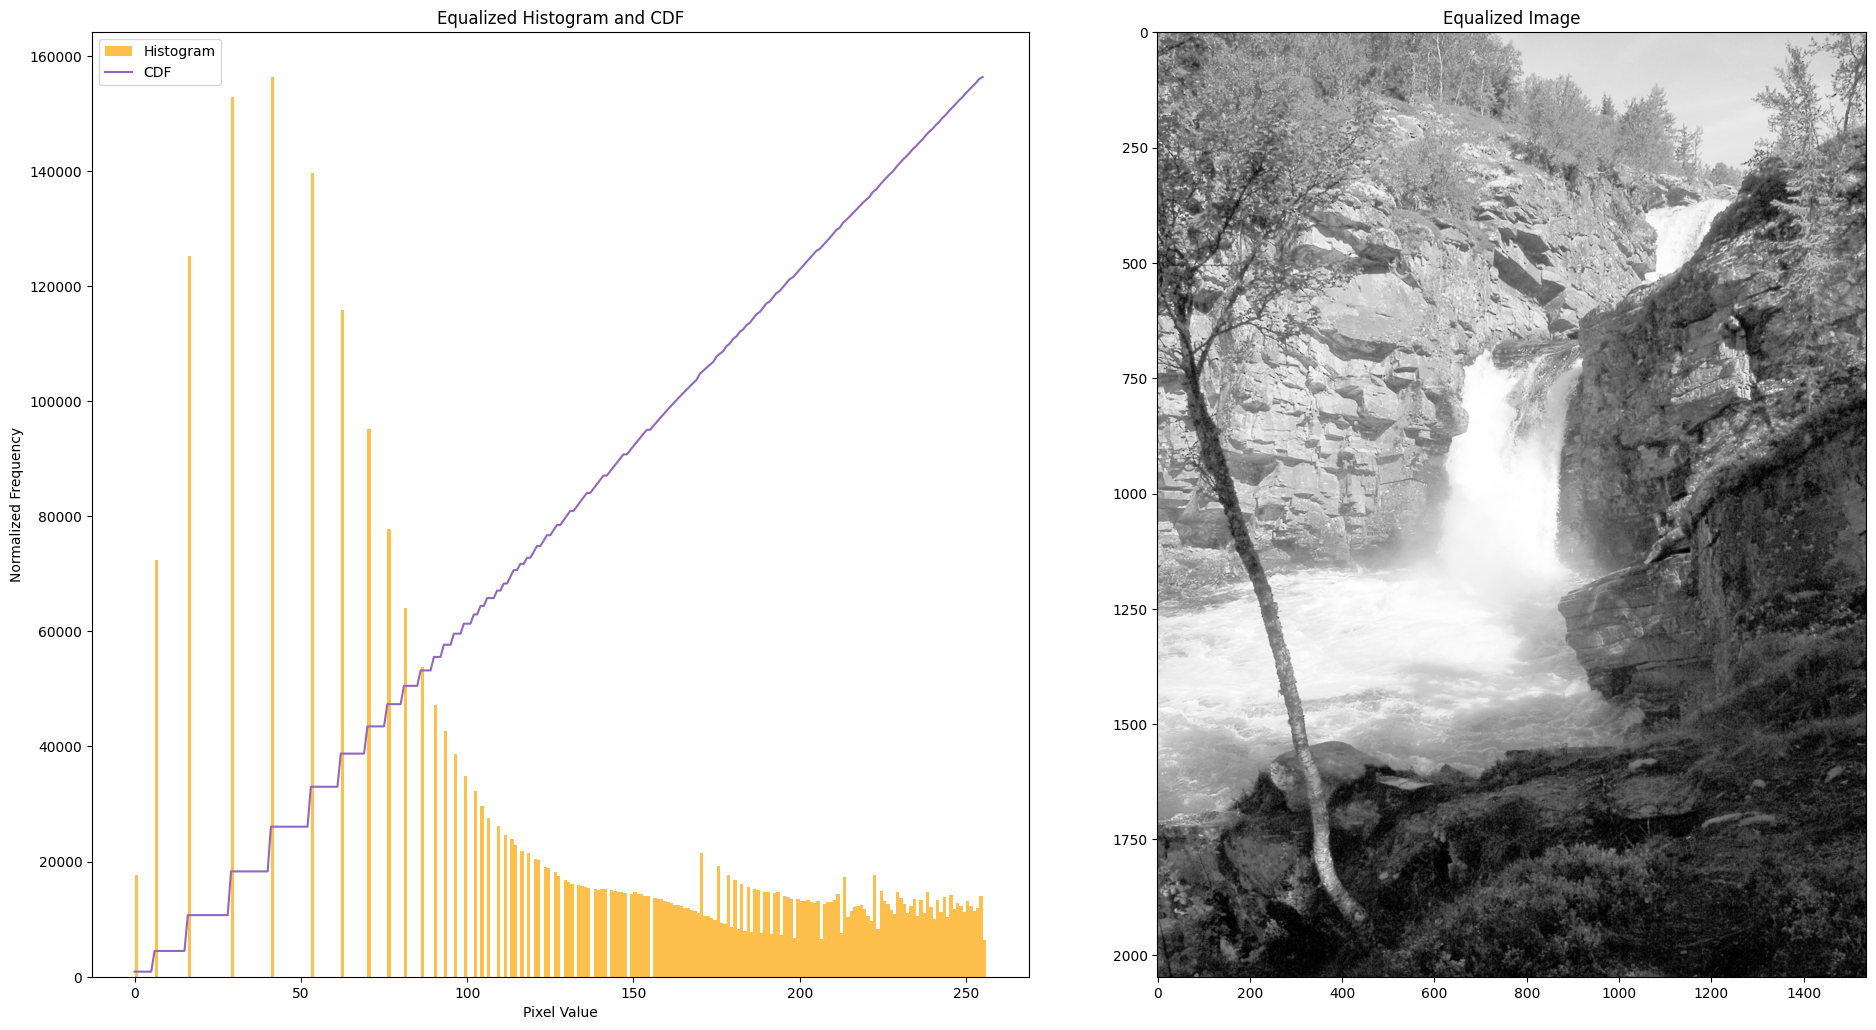

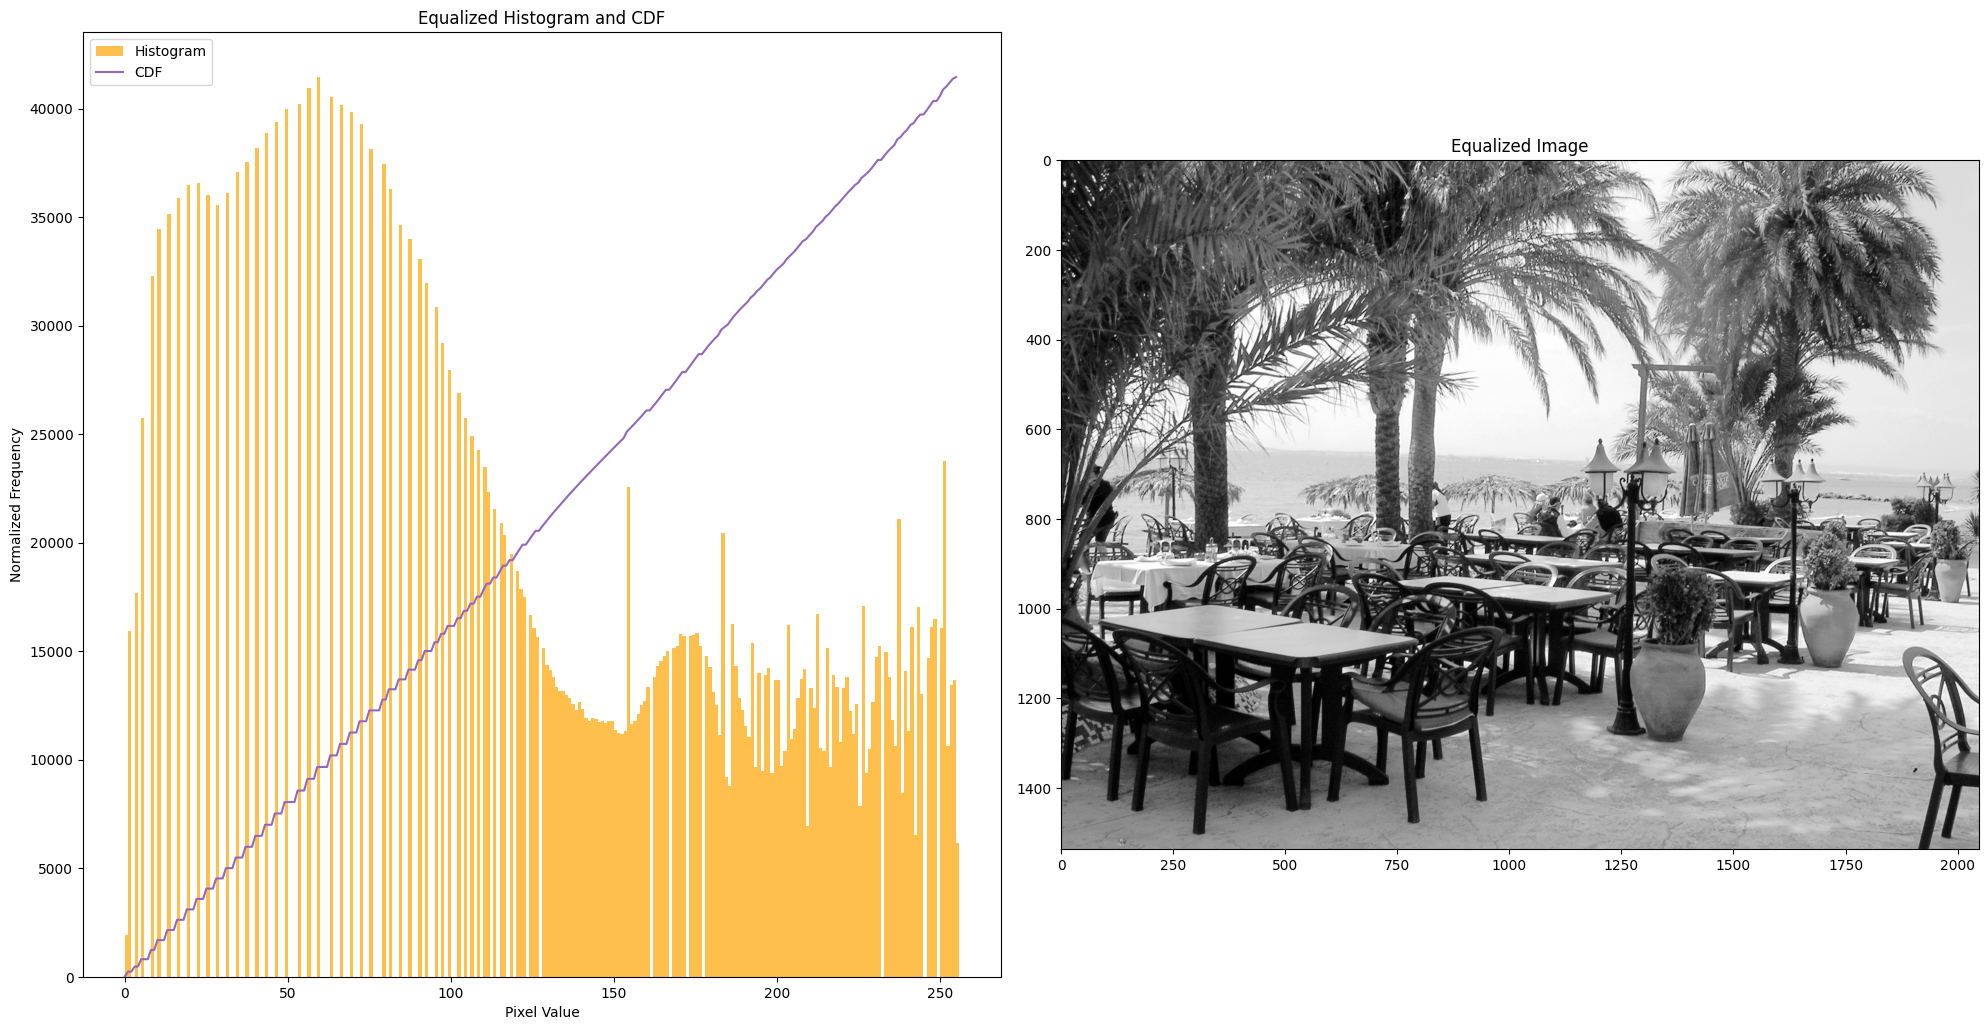

In [67]:
for i in paths:
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    his_eq(img)

Histogram equalization is a technique used to enhance the contrast of an image by redistributing the pixel values in a way that stretches the intensity range.
1. Histogram Effect:
Histogram equalization has a significant impact on the histogram of an image:

- Original Histogram: The original histogram of an image may have peaks and valleys, indicating areas of low and high contrast. In some cases, the histogram might be skewed or concentrated within a limited range of pixel values.

- Equalized Histogram: After applying histogram equalization, the histogram becomes more uniform and spreads out over the entire range of pixel values. The goal is to make the histogram as flat as possible in order to increse contrast. Peaks in the original histogram are spread out, and valleys are filled in, resulting in a more balanced distribution of pixel values.

- Enhanced Contrast: Dark areas become darker, and bright areas become brighter, leading to improved visibility of details.

- Over-Amplification Caution: In some cases, histogram equalization can over-amplify noise, which may result in unwanted artifacts, like in our case as you can see in the images above. Some defect like counturing.

2. Cumulative Distribution Function (CDF) Effect:
The CDF represents the cumulative distribution of pixel values in an image. Histogram equalization also has a notable effect on the CDF:

- Original CDF: The CDF of the original image typically starts at 0 and gradually increases to 1.

- Equalized CDF: After histogram equalization, the CDF becomes almost linear. In some example mode evidently than others it forms a stairs shape due to the missing of some of the values in the image since applying equalization without interpolation will lead to some values not being present in the image This represents that more pixel values are evenly distributed across the entire range of possible values.

- Improved Contrast and Visibility: The equalized CDF ensures that more intensity levels are utilized, which leads to improved contrast and better visibility of image features.


**c)** Explain why the discrete histogram equalization usually do not give a completely flat histogram.

Digital images have specific pixel value rangesin our case 0 to 255 since they are all grayscale images, making them finite and fixed. Histogram equalization is a very useful tool for improving the contrast of images. However, it has some limitations caused by the nature of the method.
The original pixel values in an image depend on the data it represents. If the data has gaps or clusters in certain brightness levels, our equalization can only shuffle those values around without applying any interpolation. This can lead to a histogram that is not perfectly flat.

Digital images, with respect to reality are a quantized rappresentation. Applying histogram equalization to these images can cause some values to be over-represented and others to be under-represented because of that initial rounding.

Additionally, when you have pixels at the very bright and very dark ends (like 0 and 255 in an 8-bit image), they might not have enough neighbors to help with equalization, leading to uneven results in those areas.

Lastly, in parts of an image with very few pixels or a lot of noise, the equalization process might not give us that perfectly flat histogram we want. This is because noise or the small sample size can mess with the equalization.


## Problem 4

Noise is a common problem in digital images. 
In this problem we want to study estimation of camera noise. 
We have a set of $K$ images. 
The only difference between the images is the noise value at each pixel. 

Assume that the noise is additive and uncorrelated with the gray values of the image such that for each image we have:
$g_{k} = f + \eta_{k},\, k = 1, 2, \;\cdots\;,K$, where $g_{k}$ is the $k$-th image with noise $\eta_{k}$. 

The image without noise, $f$, is unchanged (here we have not shown the indexes $(x,y)$). 
The mean image is given by the average value:

$$
g_{k} = f + \eta_{k},\, k = 1, 2, \ldots, K,
$$

Then it can be shown that


$$
\overline{g}(x,y) = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y).
$$

$$
E\{\overline{g}(x,y)\} = f(x,y)
$$
and
$$
\sigma^{2}_{\overline{g}(x,y)} = \frac{1}{K}\sigma^{2}_{\eta(x,y)}.
$$

**a)** Show how to derive these two results using the first equation and the information given in the text.


Given the equation:
\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y)
\end{equation}

We need to derive and fin the expected value  $E\{\overline{g}(x,y)\} = f(x,y)$

Since the Expectation is a linear function we can write the following:
\begin{equation}
    E\{\overline{g}(x,y)\} = E\{\frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y)\} = \frac{1}{K}\sum_{k = 1}^{K}E\{g_{k}(x,y)\}
\end{equation}

By definition of the noise we can write:
\begin{equation}
    =\frac{1}{K}\sum_{k = 1}^{K}E\{f(x,y)+\eta_{k}(x, y)\}
\end{equation}

Since f(x,y) is a constant and expectation is linear we can write:
\begin{equation}
    =\frac{1}{K}\sum_{k = 1}^{K}E\{f(x,y)\}+E\{\eta_{k}(x, y)\} = \frac{1}{K}\sum_{k = 1}^{K}f(x,y)+E\{\eta_{k}(x, y)\}
\end{equation}

Since the noise is uncorrelated with the gray values of the image we can write:
\begin{equation}
    = \frac{1}{K}\sum_{k = 1}^{K}f(x,y)+0 = \frac{1}{K}\sum_{k = 1}^{K}f(x,y)
\end{equation}

So we can conclude that:
\begin{equation}
    E\{\overline{g}(x,y)\} = f(x,y)
\end{equation}

Now in order to derive the variance we can use the following equation of the definition of variance:
\begin{equation}
    \sigma^{2}_{\overline{g}(x,y)} = E\{(\overline{g}(x,y)-E\{\overline{g}(x,y)\})^{2}\}
\end{equation}

we can substitute the value of the expected value that we found in the previous step:
\begin{equation}
    = E\{(\frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y)-f(x,y))^{2}\}
\end{equation}

By definition we can say:
\begin{equation}
    = E\{(\frac{1}{K}\sum_{k = 1}^{K}f(x,y)+\eta_{k}(x, y)-f(x,y))^{2}\}
\end{equation}

Since the noise is uncorrelated with the gray values of the image we can write:
\begin{equation}
    = E\{(\frac{1}{K}\sum_{k = 1}^{K}\eta_{k}(x, y))^{2}\}
\end{equation}

We can now take out the constant $\frac{1}{K^{2}}$ and by using the definition of variance we can write:
\begin{equation}
    = \frac{1}{K^{2}}E\{(\sum_{k = 1}^{K}\eta_{k}(x, y))^{2}\} = \frac{1}{K^{2}}\sum_{k = 1}^{K}\sigma^{2}_{\eta(x,y)}
\end{equation}

Sum of variances is equal to the variance of the sum, so we can write:
\begin{equation}
    = \frac{1}{K^{2}}\sum_{k = 1}^{K}\sigma^{2}_{\eta(x,y)} = \frac{1}{K^{2}}K\sigma^{2}_{\eta(x,y)} = \frac{1}{K}\sigma^{2}_{\eta(x,y)}
\end{equation}

So we can conclude that:
\begin{equation}
    \sigma^{2}_{\overline{g}(x,y)} = \frac{1}{K}\sigma^{2}_{\eta(x,y)}
\end{equation}

## 
### Delivery (dead line) on CANVAS: 22.09.2023 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no


### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.